<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reducción-de-la-dimensionalidad" data-toc-modified-id="Reducción-de-la-dimensionalidad-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reducción de la dimensionalidad</a></span><ul class="toc-item"><li><span><a href="#PCA-con-Python" data-toc-modified-id="PCA-con-Python-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA con Python</a></span></li><li><span><a href="#PCA-con-Scikit" data-toc-modified-id="PCA-con-Scikit-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>PCA con Scikit</a></span></li><li><span><a href="#Clasificador-dígitos-escritos-a-mano-con-SVM-usando-PCA" data-toc-modified-id="Clasificador-dígitos-escritos-a-mano-con-SVM-usando-PCA-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Clasificador dígitos escritos a mano con SVM usando PCA</a></span></li><li><span><a href="#Análisis-discriminate-lineal-(ADL)" data-toc-modified-id="Análisis-discriminate-lineal-(ADL)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Análisis discriminate lineal (ADL)</a></span></li></ul></li></ul></div>

# Reducción de la dimensionalidad

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data , columns = cancer.feature_names)
df['y'] = cancer.target[df.index]
scaler = StandardScaler()
X = df.iloc[:,:-1]
scaler.fit(X)
X_escalado = scaler.transform(X)

## PCA con Python

In [2]:
X_media = np.mean(X_escalado, axis=0)
X = X_escalado - X_media

In [3]:
matriz_cov = np.cov(X, rowvar=False)        
valores_propios, vectores_propios = np.linalg.eig(matriz_cov)
vectores_propios = vectores_propios.T

In [4]:
valores_propios.shape, valores_propios.shape

((30,), (30,))

In [5]:
componentes_ordenados = np.argsort(valores_propios)[::-1]        
matriz_proyeccion = vectores_propios[componentes_ordenados[:2]]

In [6]:
X_t = np.dot(X, matriz_proyeccion.T)
X_t.shape

(569, 2)

In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Carlos pineda\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


Text(0.5, 1.0, 'PCA Breast Cancer con python')

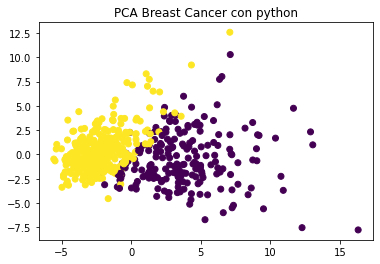

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X_t[:, 0], X_t[:, 1], c=df['y'].values)
plt.title("PCA Breast Cancer con python")

In [8]:
varianza_explicada = valores_propios[componentes_ordenados]
proporcion_varinza_explicada = varianza_explicada / valores_propios.sum()

## PCA con Scikit

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_escalado)
X_pca = pca.transform(X_escalado)
print("Forma Original: {}".format(str(X_escalado.shape)))
print("Forma Reducida: {}".format(str(X_pca.shape)))

Forma Original: (569, 30)
Forma Reducida: (569, 2)


In [10]:
df_pca = pd.DataFrame(data = X_pca
             , columns = ['CP1', 'CP2'])
df_pca

,CP1,CP2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


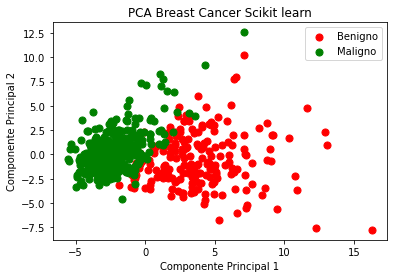

In [11]:
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title("PCA Breast Cancer Scikit learn")
colores = ['r', 'g']
destino = [0, 1]
for vd, cl in zip(destino,colores):
    indice = df['y'] == vd   
    plt.scatter(df_pca.loc[indice, 'CP1']
               , df_pca.loc[indice, 'CP2'], c = cl, s = 50)

plt.legend(['Benigno', 'Maligno'])

In [12]:
print("Forma de los compoentes PCA: {}".format(pca.components_.shape))

Forma de los compoentes PCA: (2, 30)


In [13]:
print("Componentes PCA:\n{}".format(pca.components_))

Componentes PCA:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'varianza acumulativa')

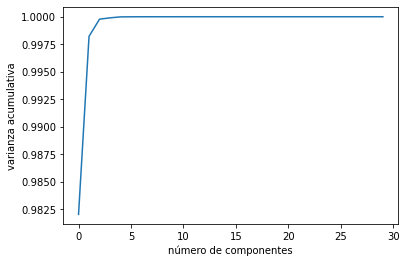

In [14]:
pca = PCA().fit(cancer.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulativa')

## Clasificador dígitos escritos a mano con SVM usando PCA

In [15]:
from sklearn.datasets import load_digits
digitos = load_digits()
X, y = digitos.data, digitos.target

In [16]:
clases = np.unique(y)
nClases = len(clases)
print('Number total de clase : ', nClases)
print('Clases : ', clases)

Number total de clase :  10
Clases :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Número 0')

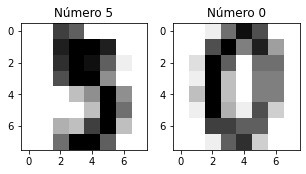

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(digitos.images[5], plt.cm.gray_r)
plt.title("Número " + str(digitos.target[5]) )

plt.subplot(122)
plt.imshow(digitos.images[10], plt.cm.gray_r)
plt.title("Número " + str(digitos.target[10]) )

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_ent, X_pru,y_ent, y_pru = train_test_split(X,y, test_size = 0.2, random_state=43)
X_ent = X_ent / 255
X_pru = X_pru / 255
clf = SVC(C=1 , gamma=1)
clf.fit(X_ent, y_ent)
print("Exactitud conjunto de entrenamiento {:.2f}".format(clf.score(X_ent, y_ent)))
y_pred = clf.predict(X_pru)
print("Exactitud conjunto de prueba {:.2f}".format(accuracy_score(y_pru, y_pred)))

Exactitud conjunto de entrenamiento 0.94
Exactitud conjunto de prueba 0.93


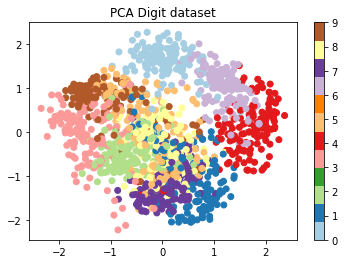

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10 , whiten=True)
X_pca = pca.fit_transform(X_ent)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_ent, cmap="Paired")
plt.title("PCA Digit dataset")
plt.colorbar()

In [20]:
from sklearn.metrics import accuracy_score
X_entr, X_prue, y_entr, y_prue = train_test_split(X_pca, y_ent, test_size=0.2, random_state=1)
clf = SVC(C=1 , gamma=1)
clf.fit(X_entr, y_entr)
print("Exactitud conjunto de entrenamiento {:.2f}".format(clf.score(X_entr, y_entr)))
y_pred = clf.predict(X_prue)
print("Exactitud conjunto de prueba {:.2f}".format(accuracy_score(y_prue, y_pred)))

Exactitud conjunto de entrenamiento 1.00
Exactitud conjunto de prueba 0.95


In [21]:
X_pca

array([[ 0.86447702, -0.70437894, -0.82255609, ..., -1.72134587,
        -0.81119865,  2.51654267],
       [ 1.99242007,  0.14375874, -0.6035162 , ...,  1.44207638,
         0.5005133 , -1.15922502],
       [-0.43187605, -1.29612765,  0.43490007, ...,  2.20434046,
         1.67941797,  0.49087931],
       ...,
       [ 1.11792092, -1.32301449, -0.18117401, ..., -1.48456259,
        -1.09492533,  0.60099271],
       [ 0.45942121, -0.38936102,  0.19500344, ..., -1.34260358,
        -0.31777093, -1.47042904],
       [-1.11497992,  0.05197131, -0.48778699, ..., -1.14654826,
        -0.06202445, -0.67117026]])

Text(0, 0.5, 'varianza acumulativa')

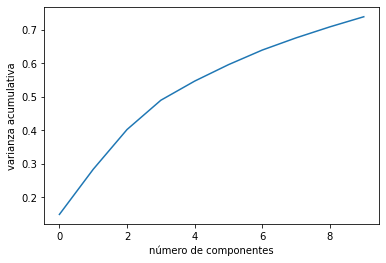

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulativa')

## Análisis discriminate lineal (ADL)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=5)
ldaX_ent= lda.fit_transform(X_ent, y_ent)
ldaX_pru = lda.transform(X_pru)

C:\Users\Carlos pineda\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [24]:
X_entr, X_prue, y_entr, y_prue = train_test_split(ldaX_ent, y_ent, test_size=0.2, random_state=1)
clf = SVC(C=1 , gamma=1)
clf.fit(X_entr, y_entr)
print("Exactitud conjunto de entrenamiento {:.2f}".format(clf.score(X_entr, y_entr)))
y_pred = clf.predict(X_prue)
print("Exactitud conjunto de prueba {:.2f}".format(accuracy_score(y_prue, y_pred)))

Exactitud conjunto de entrenamiento 0.99
Exactitud conjunto de prueba 0.90
